<a href="https://colab.research.google.com/github/Dhruv454000/ChatBlast/blob/main/201070015_Dhruv_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
 
  Name : Dhruv Kunjadiya
  Branch : CS
  Reg no : 201070015
  Batch 1
  Topic : Implement ANN from Scratch on wbcd dataset.

"""

'\n \n  Name : Dhruv Kunjadiya\n  Branch : CS\n  Reg no : 201070015\n  Batch 1\n  Topic : Implement ANN from Scratch on wbcd dataset.\n\n'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
df = pd.read_csv(url, header=None)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score



In [ ]:
df.describe

<bound method NDFrame.describe of            0  1      2      3       4       5        6        7        8   \
0      842302  M  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.30010   
1      842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690   
2    84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740   
3    84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140   
4    84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800   
..        ... ..    ...    ...     ...     ...      ...      ...      ...   
564    926424  M  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390   
565    926682  M  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400   
566    926954  M  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251   
567    927241  M  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140   
568     92751  B   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000   

          9   ...      22     23      24 

In [ ]:
# check the shape and basic information of the dataset
print(df.shape)
print(df.info())

(569, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    int64  
 1   1       569 non-null    object 
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float

In [ ]:
X = df.iloc[:, 2:].values
y = df.iloc[:, 1].values
y = np.where(y == 'M', 1, 0)

sc = StandardScaler()
X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
input_dim = X_train.shape[1]
hidden_dim = 4
output_dim = 1

np.random.seed(0)
w1 = np.random.randn(input_dim, hidden_dim)
b1 = np.zeros((1, hidden_dim))
w2 = np.random.randn(hidden_dim, output_dim)
b2 = np.zeros((1, output_dim))


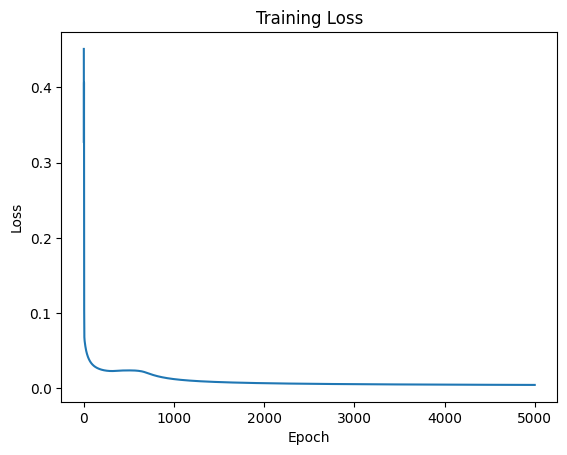

Accuracy: 0.9824561403508771


In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return x * (1 - x)
epochs = 5000
learning_rate = 0.1

import matplotlib.pyplot as plt

# initialize lists to store the loss and accuracy for each epoch
losses = []
accuracies = []

# train the neural network
for i in range(epochs):
    # forward propagation
    z1 = np.dot(X_train, w1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, w2) + b2
    y_pred = sigmoid(z2)

    # calculate the loss
    error = y_train.reshape(-1, 1) - y_pred
    loss = np.mean(np.abs(error))
    losses.append(loss)

    # calculate the accuracy
    accuracy = accuracy_score(y_train, (y_pred > 0.5).astype(int))
    accuracies.append(accuracy)

    # backward propagation
    delta2 = error * sigmoid_deriv(y_pred)
    delta1 = delta2.dot(w2.T) * sigmoid_deriv(a1)

    # update weights and biases
    w2 += a1.T.dot(delta2) * learning_rate
    b2 += np.sum(delta2, axis=0, keepdims=True) * learning_rate
    w1 += X_train.T.dot(delta1) * learning_rate
    b1 += np.sum(delta1, axis=0) * learning_rate

# plot the loss curve
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()
 
# make predictions on the test set
y_pred = (sigmoid(np.dot(sigmoid(np.dot(X_test, w1) + b1), w2) + b2) > 0.5).astype(int).flatten()

# calculate the accuracy of the model
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))